In [42]:
#imports
import os
import numpy as np
import scipy
from PIL import Image
from scipy import ndimage
import tensorflow as tf
import matplotlib.pyplot as plt


In [86]:
def picToData(fname,num_px):
    image = np.array(ndimage.imread(fname, flatten=False))
    my_image = scipy.misc.imresize(image, size=(num_px, num_px))
    return(my_image)


Number of training examples: m_train = 22
Number of testing examples: m_test = 13
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (22, 64, 64, 3)
train_set_y shape: (1, 22)
test_set_x shape: (13, 64, 64, 3)
test_set_y shape: (1, 13)


In [88]:
#loadData
def loadData(num_px=64):
    train_set_x_orig=[]
    train_set_y = []
    test_set_x_orig = []
    test_set_y = []
    train_size=0
    test_size=0
    for name in os.listdir("trainset/animated/"):
        train_set_x_orig.append(picToData("trainset/animated/"+name,num_px))
        train_set_y.append(0)
        train_size=train_size+1
    for name in os.listdir("trainset/real/"):
        train_set_x_orig.append(picToData("trainset/real/"+name,num_px))
        train_set_y.append(1)
        train_size=train_size+1
    for name in os.listdir("testset/animated/"):
        test_set_x_orig.append(picToData("testset/animated/"+name,num_px))
        test_set_y.append(0)
        test_size=test_size+1
    for name in os.listdir("testset/real/"):
        test_set_x_orig.append(picToData("testset/real/"+name,num_px))
        test_set_y.append(1)
        test_size=test_size+1

    data={"train_size":train_size,"test_size":test_size,"train_set_x_orig":train_set_x_orig,"train_set_y":train_set_y,
          "test_set_x_orig":test_set_x_orig,"test_set_y":test_set_y,"classes":["animated","realistic"]}
    return data


Number of training examples: m_train = 22
Number of testing examples: m_test = 13
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (22, 64, 64, 3)
train_set_y shape: (1, 22)
test_set_x shape: (13, 64, 64, 3)
test_set_y shape: (1, 13)


Number of training examples: m_train = 22
Number of testing examples: m_test = 13
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (22, 64, 64, 3)
train_set_y shape: (1, 22)
test_set_x shape: (13, 64, 64, 3)
test_set_y shape: (1, 13)


In [127]:

data=loadData(64)
trainSize=data["train_size"]
train_set_x_orig=np.asarray(data["train_set_x_orig"])
train_set_y=np.asarray(data["train_set_y"]).reshape(1,len(data["train_set_y"]))
test_set_x_orig=np.asarray(data["test_set_x_orig"])
test_set_y=np.asarray(data["test_set_y"]).reshape(1,len(data["test_set_y"]))
classes=data["classes"]


Number of training examples: m_train = 22
Number of testing examples: m_test = 13
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (22, 64, 64, 3)
train_set_y shape: (1, 22)
test_set_x shape: (13, 64, 64, 3)
test_set_y shape: (1, 13)


In [128]:
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]
print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 22
Number of testing examples: m_test = 13
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (22, 64, 64, 3)
train_set_y shape: (1, 22)
test_set_x shape: (13, 64, 64, 3)
test_set_y shape: (1, 13)


In [129]:
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0],-1).T
print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))

train_set_x_flatten shape: (12288, 22)
train_set_y shape: (1, 22)
test_set_x_flatten shape: (12288, 13)
test_set_y shape: (1, 13)
sanity check after reshaping: [  0  53 128   1  50]


In [130]:
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.


In [131]:
def sigmoid(z):
    s = 1/(1+np.exp(-z))
    return s

In [132]:
def initialize_with_zeros(dim):
    w = np.zeros((dim,1))
    b = 0
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [133]:
def propagate(w, b, X, Y):
    m = X.shape[1]
    A = sigmoid(np.dot(w.T,X)+b)     
    cost = (-1/m)*np.sum(np.dot(Y,np.log(A.T))+np.dot((1-Y),np.log(1-A.T)))                                 
    dw = (1/m)*np.dot(X,(A-Y).T)
    db = (1/m)*np.sum(A-Y)
    
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [134]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    costs = []
    
    for i in range(num_iterations):
        grads, cost = propagate(w, b, X, Y)
        
        dw = grads["dw"]
        db = grads["db"]
        
        w = w-(learning_rate*dw)
        b = b-(learning_rate*db)
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training examples
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [135]:
def predict(w, b, X):

    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    A = sigmoid(np.dot(w.T,X)+b)
    
    for i in range(A.shape[1]):
        if A[0,i]>=0.5:
            Y_prediction[0,i]=1
    
    assert(Y_prediction.shape == (1, m))
    return Y_prediction

In [136]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    w, b = initialize_with_zeros(X_train.shape[0])

    parameters, grads, costs = optimize(w,b,X_train,Y_train,num_iterations,learning_rate,print_cost)
    
    w = parameters["w"]
    b = parameters["b"]
    
    Y_prediction_test = predict(w,b,X_test)
    Y_prediction_train = predict(w,b,X_train)

    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [137]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 5000, learning_rate = 0.001, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.283996
Cost after iteration 200: 0.202867
Cost after iteration 300: 0.157668


Cost after iteration 400: 0.128279
Cost after iteration 500: 0.107655
Cost after iteration 600: 0.092441
Cost after iteration 700: 0.080799


Cost after iteration 800: 0.071633
Cost after iteration 900: 0.064247
Cost after iteration 1000: 0.058182
Cost after iteration 1100: 0.053119


Cost after iteration 1200: 0.048835
Cost after iteration 1300: 0.045167
Cost after iteration 1400: 0.041994


Cost after iteration 1500: 0.039223
Cost after iteration 1600: 0.036785
Cost after iteration 1700: 0.034624
Cost after iteration 1800: 0.032695


Cost after iteration 1900: 0.030965
Cost after iteration 2000: 0.029404
Cost after iteration 2100: 0.027989


Cost after iteration 2200: 0.026702
Cost after iteration 2300: 0.025524
Cost after iteration 2400: 0.024444


Cost after iteration 2500: 0.023450
Cost after iteration 2600: 0.022532
Cost after iteration 2700: 0.021682
Cost after iteration 2800: 0.020892


Cost after iteration 2900: 0.020157
Cost after iteration 3000: 0.019471
Cost after iteration 3100: 0.018830


Cost after iteration 3200: 0.018228
Cost after iteration 3300: 0.017664
Cost after iteration 3400: 0.017132


Cost after iteration 3500: 0.016631
Cost after iteration 3600: 0.016159
Cost after iteration 3700: 0.015712
Cost after iteration 3800: 0.015288


Cost after iteration 3900: 0.014887
Cost after iteration 4000: 0.014506
Cost after iteration 4100: 0.014144
Cost after iteration 4200: 0.013799


Cost after iteration 4300: 0.013470
Cost after iteration 4400: 0.013156
Cost after iteration 4500: 0.012857
Cost after iteration 4600: 0.012571
Cost after iteration 4700: 0.012297


Cost after iteration 4800: 0.012034
Cost after iteration 4900: 0.011783
train accuracy: 100.0 %
test accuracy: 84.61538461538461 %


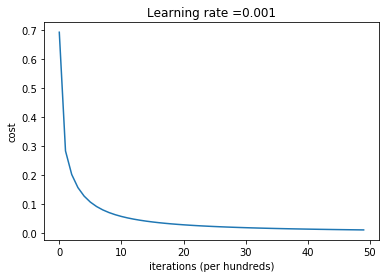

In [138]:
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

learning rate is: 0.01


train accuracy: 100.0 %
test accuracy: 84.61538461538461 %

-------------------------------------------------------

learning rate is: 0.001


train accuracy: 100.0 %
test accuracy: 76.92307692307692 %

-------------------------------------------------------

learning rate is: 0.0001


train accuracy: 95.45454545454545 %
test accuracy: 84.61538461538461 %

-------------------------------------------------------



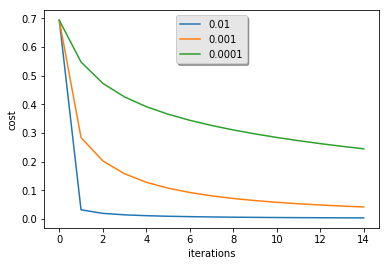

In [140]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1500, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()